# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset

df = pd.read_csv('previsao_de_renda.csv')
df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
df.dropna(inplace=True)

In [12]:
#  Criando a amostra e separando ela em anos
n_anos = 15
clientes = int(.01*df.shape[0])
min_date = df['data_ref'].min()
datas = pd.Series(pd.date_range(min_date, periods = n_anos, freq ='MS').repeat(clientes))

dados = df.sample(n = n_anos * clientes, replace=True).reset_index()
df2 = pd.concat([datas, dados], axis = 1)
df2.rename({0:'Data'}, inplace = True, axis = 'columns')
df2

,Data,index,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,12293,2016-01-01,F,False,False,0,Assalariado,Superior completo,Separado,Casa,37,5.298630,1.0,False,858.71
1,2015-01-01,13975,2016-02-01,F,False,True,1,Assalariado,Superior completo,Casado,Casa,36,0.953425,3.0,False,3249.43
2,2015-01-01,2563,2015-03-01,F,True,True,0,Assalariado,Secundário,Separado,Casa,45,3.271233,1.0,False,1896.45
3,2015-01-01,8543,2015-09-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,44,18.912329,4.0,False,14309.56
4,2015-01-01,9541,2015-10-01,M,False,False,2,Assalariado,Superior completo,União,Casa,45,8.460274,4.0,False,5369.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,2016-03-01,4885,2015-05-01,M,True,False,0,Empresário,Secundário,Solteiro,Governamental,24,1.961644,1.0,False,5268.42
1856,2016-03-01,13057,2016-02-01,F,True,False,1,Empresário,Superior completo,Solteiro,Casa,39,2.539726,2.0,False,494.24
1857,2016-03-01,7521,2015-08-01,F,False,False,0,Empresário,Secundário,Casado,Casa,37,8.849315,2.0,False,2376.56
1858,2016-03-01,13751,2016-02-01,F,False,True,0,Assalariado,Secundário,Viúvo,Casa,50,14.756164,1.0,False,4468.11


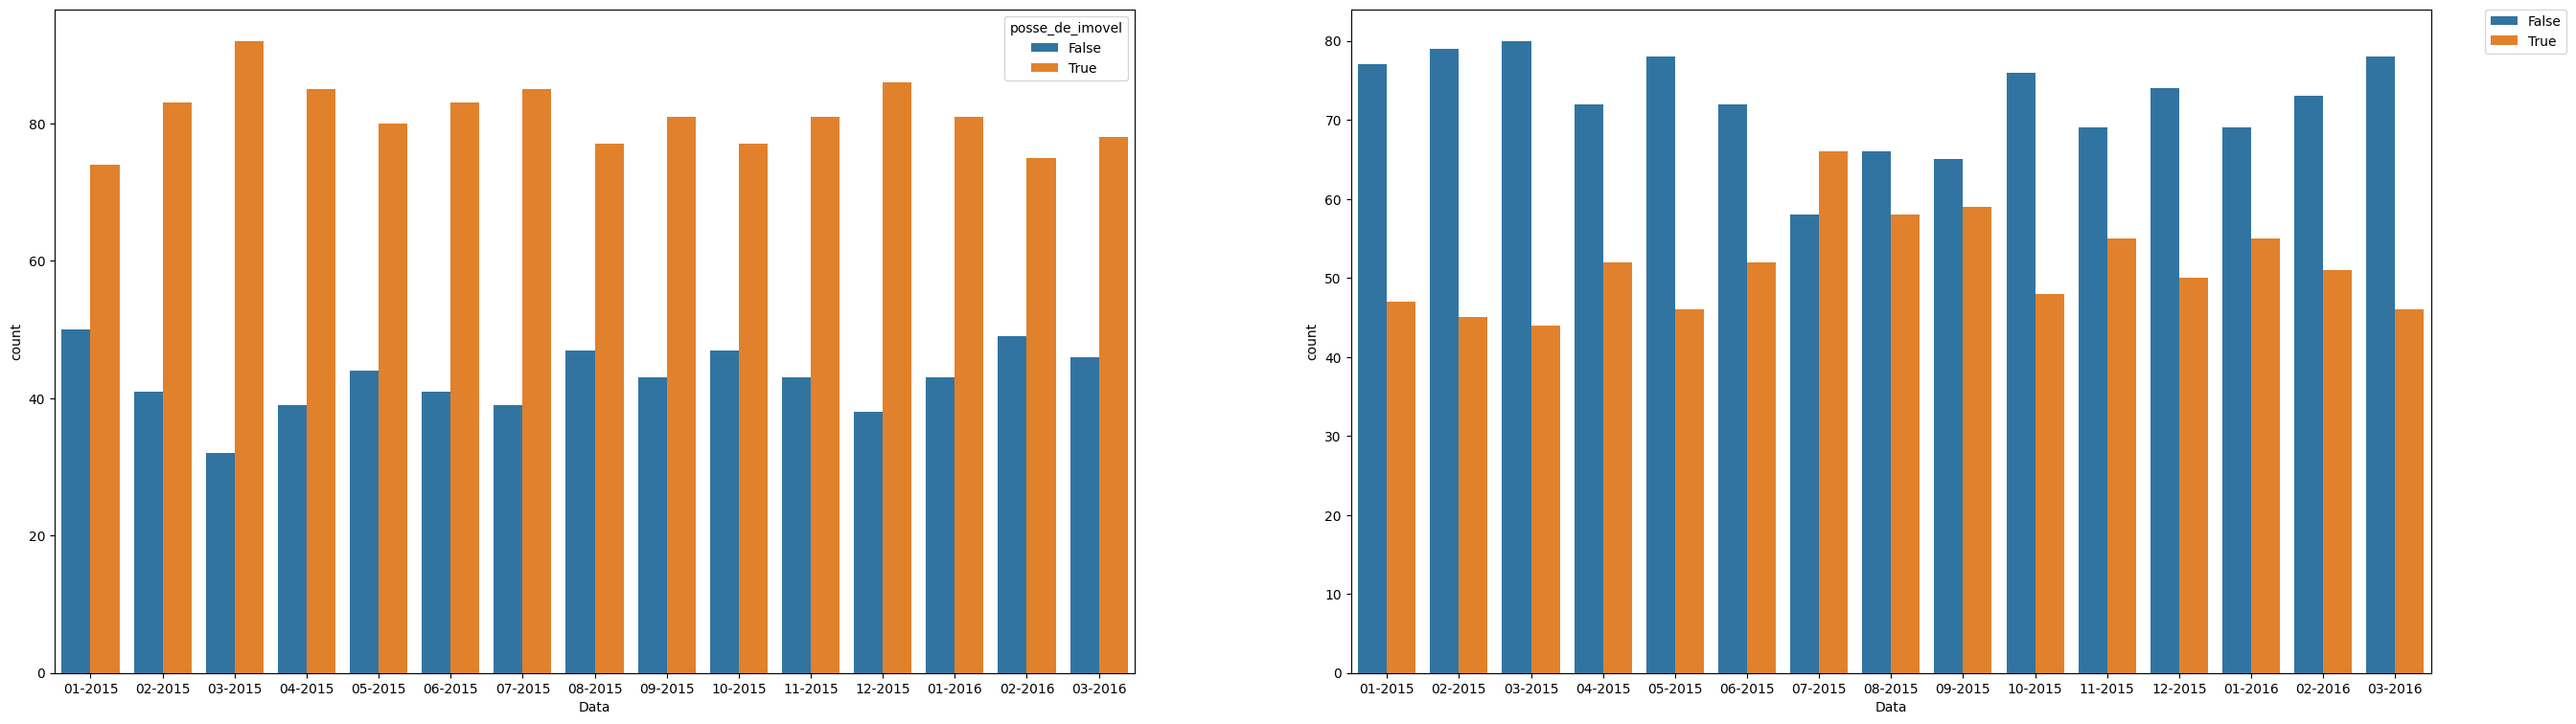

In [18]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(32, 9)

sns.countplot(x='Data',  hue = 'posse_de_imovel', data=df2, ax=axes[0])
sns.countplot(x='Data',  hue = 'posse_de_veiculo', data=df2, ax=axes[1])

tick_labs = df2['Data'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()
for ax in axes:
  ticks = ax.set_xticks(list(range(df2['Data'].nunique())))
  labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Não parece haver mudanças significativas nas posses de bens no período avaliado. Há uma pequena mudança na proporção da posse de veículo entre junho e setembro de 2015, mas nada aparentemente significativo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

['idade', 'qtd_filhos', 'renda', 'tempo_emprego', 'qt_pessoas_residencia']


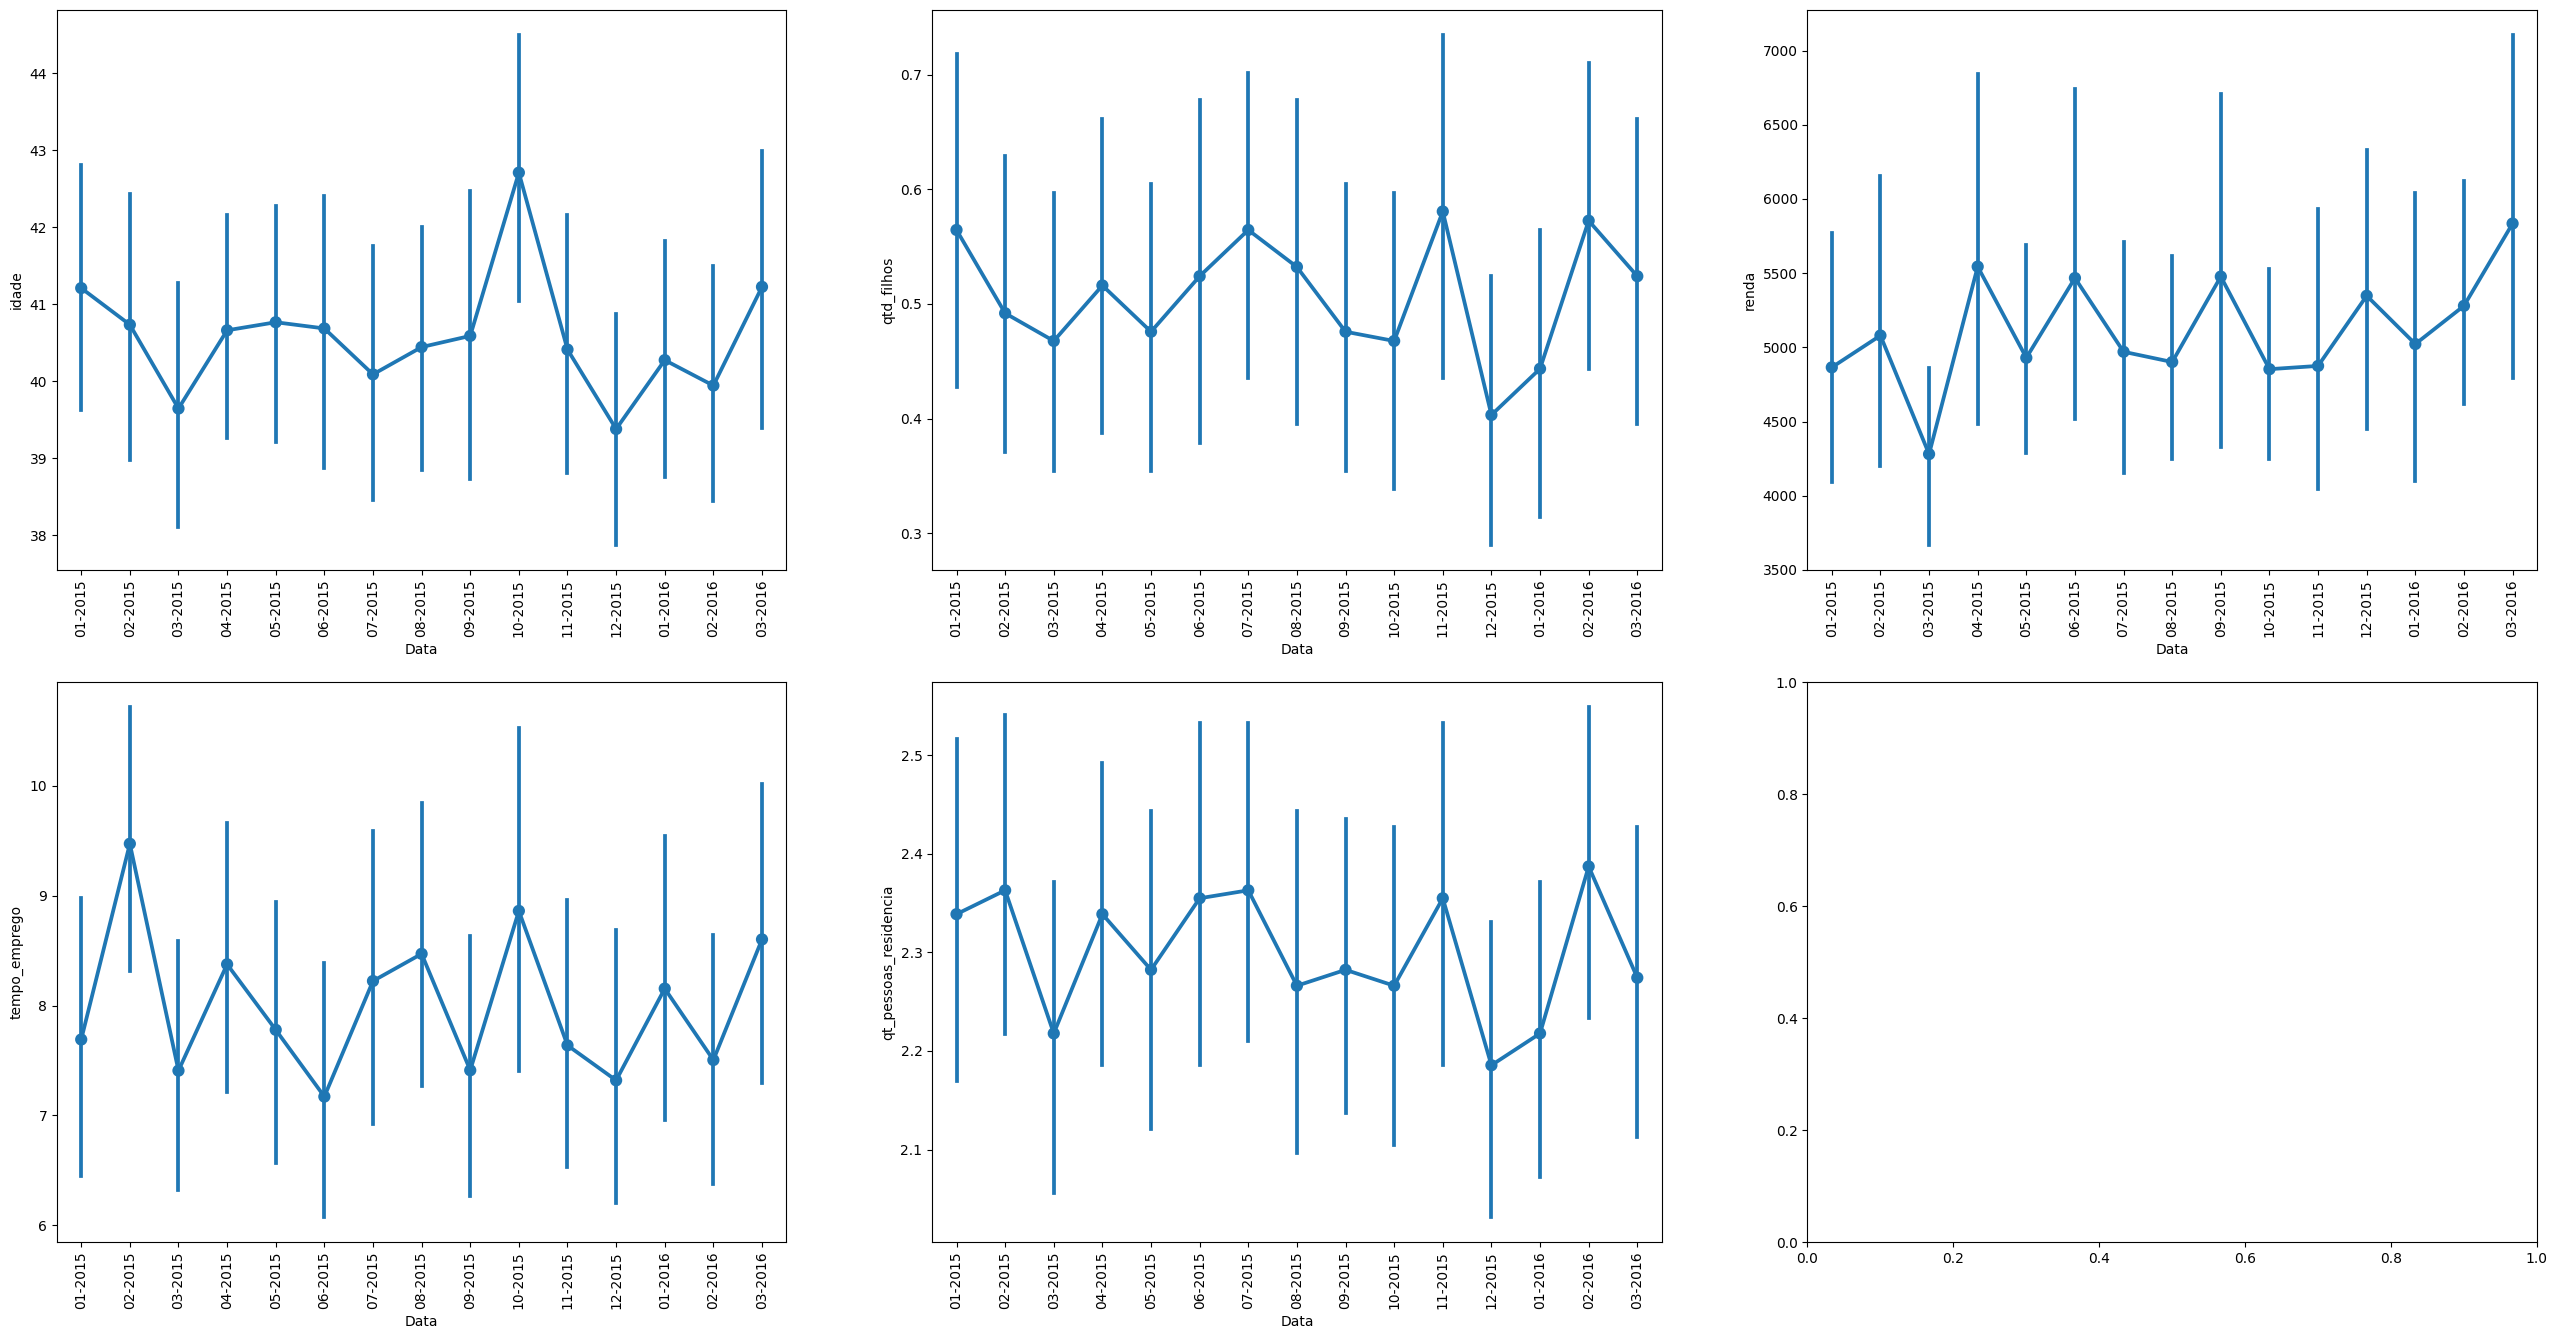

In [40]:
df_quant = df2[['idade', 'qtd_filhos', 'renda', 'tempo_emprego', 'qt_pessoas_residencia', 'Data']]
columns = df_quant.columns.to_list()
columns.remove('Data')
print(columns)
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(32, 16)

line = 0
for i, col in enumerate(columns):
    if i > 2:
        line = 1
        i = i - 3
    sns.pointplot(x='Data', y=col, data=df_quant, ax=axes[line, i])
    axes[line, i].set_xticklabels(tick_labs, rotation=90)



Há algumas oscilações nas médias de renda e idadde um pouco mais acentuadas, ainda assim, elas ainda dividem o mesmo intervalo de confiança, o que indica que sim, podemos utilizar essas variáveis em uma modelagem.